## Importing Necessary Libraries

In [1]:
import pandas as pd
import texthero as th
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the Eclipse Dataset

In [2]:
df = pd.read_csv('bugs-2023-02-11 eclipse platform.csv')
df.head()

,Bug ID,Severity,Priority,Assignee,Status,Opened,Changed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,2,normal,P5,James_Moody,RESOLVED,10-10-2001 21:34,23-06-2022 10:37,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561
1,3,normal,P5,James_Moody,RESOLVED,10-10-2001 21:34,11-07-2018 15:57,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118
2,4,normal,P5,Michael.Valenta,RESOLVED,10-10-2001 21:34,13-09-2018 01:46,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182
3,16,normal,P5,James_Moody,RESOLVED,10-10-2001 21:35,21-10-2020 10:38,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951
4,17,normal,P5,jean-michel_lemieux,RESOLVED,10-10-2001 21:35,20-04-2021 06:44,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132


## Dropping the Un-Necessary Columns

In [3]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Changed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132


## Getting the information of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32777 entries, 0 to 32776
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       32777 non-null  int64 
 1   Severity     32777 non-null  object
 2   Assignee     32777 non-null  object
 3   Status       32777 non-null  object
 4   Resolution   32777 non-null  object
 5   Summary      32777 non-null  object
 6   Opened_Date  32777 non-null  object
 7   Closed_Date  32777 non-null  object
 8   Days_Taken   32777 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


## Applying Preprocessing Techniques on Summary Column

In [5]:
df['Summary']

0        Opening repository resources doesn't honor typ...
1                Sync does not indicate deletion (1GIEN83)
2        need better error message if catching up over ...
3                              auto-merge button (1GBBEBB)
4                    look at gender change cases (1GBCX61)
                               ...                        
32772                 No test results since I20220321-0920
32773    ExceptionDecoratorTestCase.testDisableDecorato...
32774               Welcome screen should not hide toolbar
32775    Remove dead logic from CSSPropertyBackgroundSW...
32776    MarkerSupportView: It should be possible to de...
Name: Summary, Length: 32777, dtype: object

### 1. Tokenization

In [6]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [7]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561,"[Opening, repository, resources, does, honor, ..."
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118,"[Sync, does, not, indicate, deletion]"
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182,"[need, better, error, message, if, catching, u..."
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951,[button]
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132,"[look, at, gender, change, cases]"
...,...,...,...,...,...,...,...,...,...,...
32772,579361,blocker,platform-releng-inbox,RESOLVED,FIXED,No test results since I20220321-0920,22-03-2022,22-03-2022,0,"[No, test, results, since]"
32773,579415,normal,Platform-UI-Inbox,RESOLVED,FIXED,ExceptionDecoratorTestCase.testDisableDecorato...,25-03-2022,28-03-2022,3,"[fails, since]"
32774,579463,normal,Lars.Vogel,RESOLVED,FIXED,Welcome screen should not hide toolbar,29-03-2022,30-03-2022,1,"[Welcome, screen, should, not, hide, toolbar]"
32775,579475,normal,Lars.Vogel,RESOLVED,FIXED,Remove dead logic from CSSPropertyBackgroundSW...,29-03-2022,16-08-2022,140,"[Remove, dead, logic, from, CSSPropertyBackgro..."


### 2. Converting the Summary into Lowercase

In [8]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0             opening repository resources does honor type
1                          sync does not indicate deletion
2        need better error message if catching up over ...
3                                                   button
4                              look at gender change cases
                               ...                        
32772                                no test results since
32773                                          fails since
32774               welcome screen should not hide toolbar
32775    remove dead logic from csspropertybackgroundsw...
32776    markersupportview it should be possible to det...
Name: String_Tokenized, Length: 32777, dtype: object

### 3. Removing the Stopwords from the Summary

In [9]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0                  opening repository resources honor type
1                                   sync indicate deletion
2              need better error message catching resource
3                                                   button
4                                 look gender change cases
                               ...                        
32772                                   test results since
32773                                          fails since
32774                          welcome screen hide toolbar
32775    remove dead logic csspropertybackgroundswthand...
32776    markersupportview possible determine filter se...
Name: String_Tokenized, Length: 32777, dtype: object

### 4. Removing the Punctuations

In [10]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561,"[Opening, repository, resources, does, honor, ...",opening repository resources honor type,opening repository resources honor type
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118,"[Sync, does, not, indicate, deletion]",sync indicate deletion,sync indicate deletion
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182,"[need, better, error, message, if, catching, u...",need better error message catching resource,need better error message catching resource
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951,[button],button,button
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132,"[look, at, gender, change, cases]",look gender change cases,look gender change cases


### 5. Removing ' " ' with blank space ' '

In [11]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0                  opening repository resources honor type
1                                   sync indicate deletion
2              need better error message catching resource
3                                                   button
4                                 look gender change cases
                               ...                        
32772                                   test results since
32773                                          fails since
32774                          welcome screen hide toolbar
32775    remove dead logic csspropertybackgroundswthand...
32776    markersupportview possible determine filter se...
Name: Summary_wo_Punctuation, Length: 32777, dtype: object

### 6. Stemming the Summary Column

In [12]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x]) 

### 7. Converting the Stemmed column into string type

In [13]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Severity,Assignee,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,2,normal,James_Moody,RESOLVED,FIXED,Opening repository resources doesn't honor typ...,10-10-2001,23-06-2022,7561,"[Opening, repository, resources, does, honor, ...",opening repository resources honor type,"[opening, repository, resources, honor, type]","[open, repositori, resourc, honor, type]",open repositori resourc honor type
1,3,normal,James_Moody,RESOLVED,FIXED,Sync does not indicate deletion (1GIEN83),10-10-2001,11-07-2018,6118,"[Sync, does, not, indicate, deletion]",sync indicate deletion,"[sync, indicate, deletion]","[sync, indic, delet]",sync indic delet
2,4,normal,Michael.Valenta,RESOLVED,FIXED,need better error message if catching up over ...,10-10-2001,13-09-2018,6182,"[need, better, error, message, if, catching, u...",need better error message catching resource,"[need, better, error, message, catching, resou...","[need, better, error, messag, catch, resourc]",need better error messag catch resourc
3,16,normal,James_Moody,RESOLVED,FIXED,auto-merge button (1GBBEBB),10-10-2001,21-10-2020,6951,[button],button,[button],[button],button
4,17,normal,jean-michel_lemieux,RESOLVED,FIXED,look at gender change cases (1GBCX61),10-10-2001,20-04-2021,7132,"[look, at, gender, change, cases]",look gender change cases,"[look, gender, change, cases]","[look, gender, chang, case]",look gender chang case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32772,579361,blocker,platform-releng-inbox,RESOLVED,FIXED,No test results since I20220321-0920,22-03-2022,22-03-2022,0,"[No, test, results, since]",test results since,"[test, results, since]","[test, result, sinc]",test result sinc
32773,579415,normal,Platform-UI-Inbox,RESOLVED,FIXED,ExceptionDecoratorTestCase.testDisableDecorato...,25-03-2022,28-03-2022,3,"[fails, since]",fails since,"[fails, since]","[fail, sinc]",fail sinc
32774,579463,normal,Lars.Vogel,RESOLVED,FIXED,Welcome screen should not hide toolbar,29-03-2022,30-03-2022,1,"[Welcome, screen, should, not, hide, toolbar]",welcome screen hide toolbar,"[welcome, screen, hide, toolbar]","[welcom, screen, hide, toolbar]",welcom screen hide toolbar
32775,579475,normal,Lars.Vogel,RESOLVED,FIXED,Remove dead logic from CSSPropertyBackgroundSW...,29-03-2022,16-08-2022,140,"[Remove, dead, logic, from, CSSPropertyBackgro...",remove dead logic csspropertybackgroundswthand...,"[remove, dead, logic, csspropertybackgroundswt...","[remov, dead, logic, csspropertybackgroundswth...",remov dead logic csspropertybackgroundswthandl...


### 8. Applying TF-IDF using SkLearn

In [14]:
data = []
for i in df['ListString']:
    review = ''.join(i) 
    data.append(review)
print(data)

['open repositori resourc honor type', 'sync indic delet', 'need better error messag catch resourc', 'button', 'look gender chang case', 'workspac file', 'internation nsl', 'compar ca compar team stream', 'new manag queri view', 'vcm rememb version info load project version', 'ui support multilin comment', 'need distinct', 'dcr need expand comparison editor', 'releas tree updat scale', 'interrupt larg file releas', 'unhelp conflict folder', 'comparison browser save', 'mode power user mode', 'vcm save modifi file releas', 'vcm ui discard connect remov password keyr', 'compar releas slow', 'help context need ad wizard', 'compar step', 'cvs repo view version stream refresh view', 'properti folder project stream consist', 'synchron view file node tree provid replac action', 'keep sync info load version', 'parent tree', 'sync ignor mislead messag', 'featur ignor sync view', 'progress need progress monitor merg', 'replac close project version open', 'set icon action', 'resourc histori ignor'

In [15]:
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(data)

In [18]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aa : 10.704365657063827
ab : 10.704365657063827
abbrevi : 10.298900548955663
abend : 10.704365657063827
abil : 7.319975393718053
abl : 7.5473652359137136
abnorm : 10.011218476503881
abort : 9.318071295943938
aboutdialog : 10.011218476503881
aboutfeaturesdialog : 10.704365657063827
aboutinfo : 10.704365657063827
aboutplugin : 10.704365657063827
aboutpluginsdialog : 10.298900548955663
aboutpluginspag : 10.704365657063827
aboutservlet : 10.704365657063827
abouttoreleas : 10.704365657063827
abouttorun : 10.011218476503881
absenc : 10.704365657063827
absent : 10.011218476503881
absolut : 8.912606187835772
abstract : 9.200288260287554
abstractbundledata : 10.704365657063827
abstractcellcursor : 10.704365657063827
abstractcolumnlayout : 10.011218476503881
abstractcontrolcontentassistsubjectadapt : 10.704365657063827
abstractcontrolfactori : 10.704365657063827
abstractcssengin : 9.788074925189672
abstractcsspropertybackgroundhandl : 10.704365657063827
abstractdatatreenod : 10.7043

In [19]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'open': 5155, 'repositori': 6107, 'resourc': 6147, 'honor': 3274, 'type': 7689, 'sync': 7201, 'indic': 3627, 'delet': 1719, 'need': 4911, 'better': 584, 'error': 2244, 'messag': 4611, 'catch': 849, 'button': 783, 'look': 4402, 'gender': 2756, 'chang': 892, 'case': 842, 'workspac': 8324, 'file': 2462, 'internation': 3751, 'nsl': 5045, 'compar': 1157, 'ca': 793, 'team': 7308, 'stream': 7014, 'new': 4935, 'manag': 4462, 'queri': 5826, 'view': 8049, 'vcm': 8022, 'rememb': 6050, 'version': 8037, 'info': 3643, 'load': 4353, 'project': 5719, 'ui': 7709, 'support': 7143, 'multilin': 4829, 'comment': 1124, 'distinct': 1883, 'dcr': 1623, 'expand': 2328, 'comparison': 1174, 'editor': 2094, 'releas': 6036, 'tree': 7617, 'updat': 7917, 'scale': 6376, 'interrupt': 3758, 'larg': 4195, 'unhelp': 7805, 'conflict': 1266, 'folder': 2602, 'browser': 713, 'save': 6356, 'mode': 4718, 'power': 5587, 'user': 7973, 'modifi': 4740, 'discard': 1855, 'connect': 1271, 'remov': 6064, 'password': 536

In [20]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 7689)	0.41672597370151704
  (0, 3274)	0.5919803692378439
  (0, 6147)	0.3791004538180933
  (0, 6107)	0.4479609577751722
  (0, 5155)	0.3626465655477994
  (1, 1719)	0.5299335919230811
  (1, 3627)	0.6703547284678173
  (1, 7201)	0.5194178724036556
  (2, 849)	0.5675683621796191
  (2, 4611)	0.38184152457808945
  (2, 2244)	0.3077726177865719
  (2, 584)	0.46762653735080084
  (2, 4911)	0.31398702536520123
  (2, 6147)	0.346520979983952
  (3, 783)	1.0
  (4, 842)	0.455379988544391
  (4, 892)	0.3156942095499561
  (4, 2756)	0.7112943128343904
  (4, 4402)	0.4324657588981944
  (5, 2462)	0.588470724764312
  (5, 8324)	0.8085185255115467
  (6, 5045)	0.7442674662070935
  (6, 3751)	0.6678816801991749
  (7, 7014)	0.4389958649417854
  (7, 7308)	0.40811350676292346
  :	:
  (32771, 4210)	0.3725257671124301
  (32771, 299)	0.36852476314891325
  (32771, 5574)	0.41285274515429765
  (32771, 4399)	0.38472798208997405
  (32771, 4014)	0.3079101096135688
  (32772, 6773)	0.7024771958079982
  (32772, 

In [21]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
words_set = tfidf.get_feature_names_out()
print(words_set)

['aa' 'ab' 'abbrevi' ... 'zurich' 'åäöåäö' 'צהו']


In [24]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,aa,ab,abbrevi,abend,abil,abl,abnorm,abort,aboutdialog,aboutfeaturesdialog,...,zlinux,zombi,zone,zoom,zoomtest,zooom,zumbi,zurich,åäöåäö,צהו
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_tf_idf['Severity'] = df['Severity']

In [26]:
df2 = df_tf_idf.iloc[0:1000,:]

In [27]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 8463 entries, aa to Severity
dtypes: float64(8462), object(1)
memory usage: 64.6+ MB


## Genetic Algorithm with KNN

Generation: 1
Best (GA): 0.23938272276057673
Generation: 2
Best (GA): 0.23605199716379102
Generation: 3
Best (GA): 0.23274254313401085
Generation: 4
Best (GA): 0.2260243677617585
Generation: 5
Best (GA): 0.22600191444103054
Generation: 6
Best (GA): 0.22598655164263773
Generation: 7
Best (GA): 0.22272082250059086
Generation: 8
Best (GA): 0.22272082250059086
Generation: 9
Best (GA): 0.22269718742614036
Generation: 10
Best (GA): 0.22269600567241785
Generation: 11
Best (GA): 0.22269246041125026
Generation: 12
Best (GA): 0.22267473410541241
Generation: 13
Best (GA): 0.2193688253367998
Generation: 14
Best (GA): 0.2193688253367998
Generation: 15
Best (GA): 0.21936528007563225
Generation: 16
Best (GA): 0.21936528007563225
Generation: 17
Best (GA): 0.2160818246277476
Generation: 18
Best (GA): 0.2160818246277476
Generation: 19
Best (GA): 0.21607827936658003
Generation: 20
Best (GA): 0.21606528007563228
Accuracy: 78.66666666666666
Feature Size: 4117


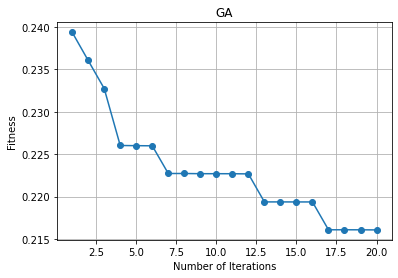

In [28]:
import numpy as np
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt



# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    
    return index


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
 
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    
    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
                Nc += 1
              
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]

        
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]
                   
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]
       
            
    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return ga_data 



# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state = 42)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 20   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
GA_acc = "Accuracy:", 100 * Acc
print(*GA_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of GA-KNN

In [29]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.780
Recall: 0.787
F1 Score: 0.716


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Particle Swarm Optimization with KNN

Iteration: 1
Best (PSO): 0.23256291656818717
Iteration: 2
Best (PSO): 0.21943027653037106
Iteration: 3
Best (PSO): 0.21943027653037106
Iteration: 4
Best (PSO): 0.21943027653037106
Iteration: 5
Best (PSO): 0.21943027653037106
Iteration: 6
Best (PSO): 0.21943027653037106
Iteration: 7
Best (PSO): 0.21943027653037106
Iteration: 8
Best (PSO): 0.21598255731505558
Iteration: 9
Best (PSO): 0.21598255731505558
Iteration: 10
Best (PSO): 0.21282673126920348
Iteration: 11
Best (PSO): 0.21282673126920348
Iteration: 12
Best (PSO): 0.21282673126920348
Iteration: 13
Best (PSO): 0.21282673126920348
Iteration: 14
Best (PSO): 0.21276646182935474
Iteration: 15
Best (PSO): 0.21276646182935474
Iteration: 16
Best (PSO): 0.21270382888206096
Iteration: 17
Best (PSO): 0.21270382888206096
Iteration: 18
Best (PSO): 0.21270382888206096
Iteration: 19
Best (PSO): 0.20942510044906643
Iteration: 20
Best (PSO): 0.20942510044906643
Accuracy: 79.33333333333333
Feature Size: 4083


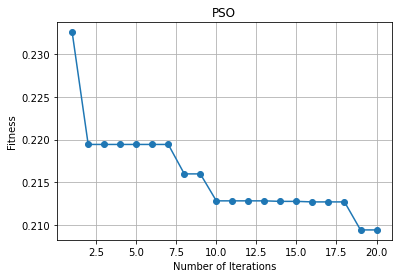

In [30]:
import numpy as np
from numpy.random import rand

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data    


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt


# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
PSO_acc = "Accuracy:", 100 * Acc
print(*PSO_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of PSO-KNN

In [31]:
from sklearn.metrics import precision_score
PSO_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(PSO_prec)
from sklearn.metrics import recall_score
PSO_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(PSO_prec)
from sklearn.metrics import f1_score
PSO_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(PSO_f1)

Precision: 0.761
Precision: 0.761
F1 Score: 0.725


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Only KNN

In [32]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  72.33333333333334


## Precision, Recall and F1-Score of only KNN

In [33]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.646
Recall: 0.723
F1 Score: 0.682


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["PSO-KNN", PSO_prec, PSO_rec, PSO_f1, PSO_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+-----------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                    |
+=============+===================+================+=================+===================================+
| KNN         | Precision: 0.646  | Recall: 0.723  | F1 Score: 0.682 | ('Accuracy: ', 72.33333333333334) |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| PSO-KNN     | Precision: 0.761  | Recall: 0.793  | F1 Score: 0.725 | ('Accuracy:', 79.33333333333333)  |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| GA-KNN      | Precision: 0.780  | Recall: 0.787  | F1 Score: 0.716 | ('Accuracy:', 78.66666666666666)  |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
